In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
sys.path.insert(1, "..")

from packages.Levy_processes import *
from packages.basicDistributionFunctions import equantile_proces


In [4]:
Image_width = 10

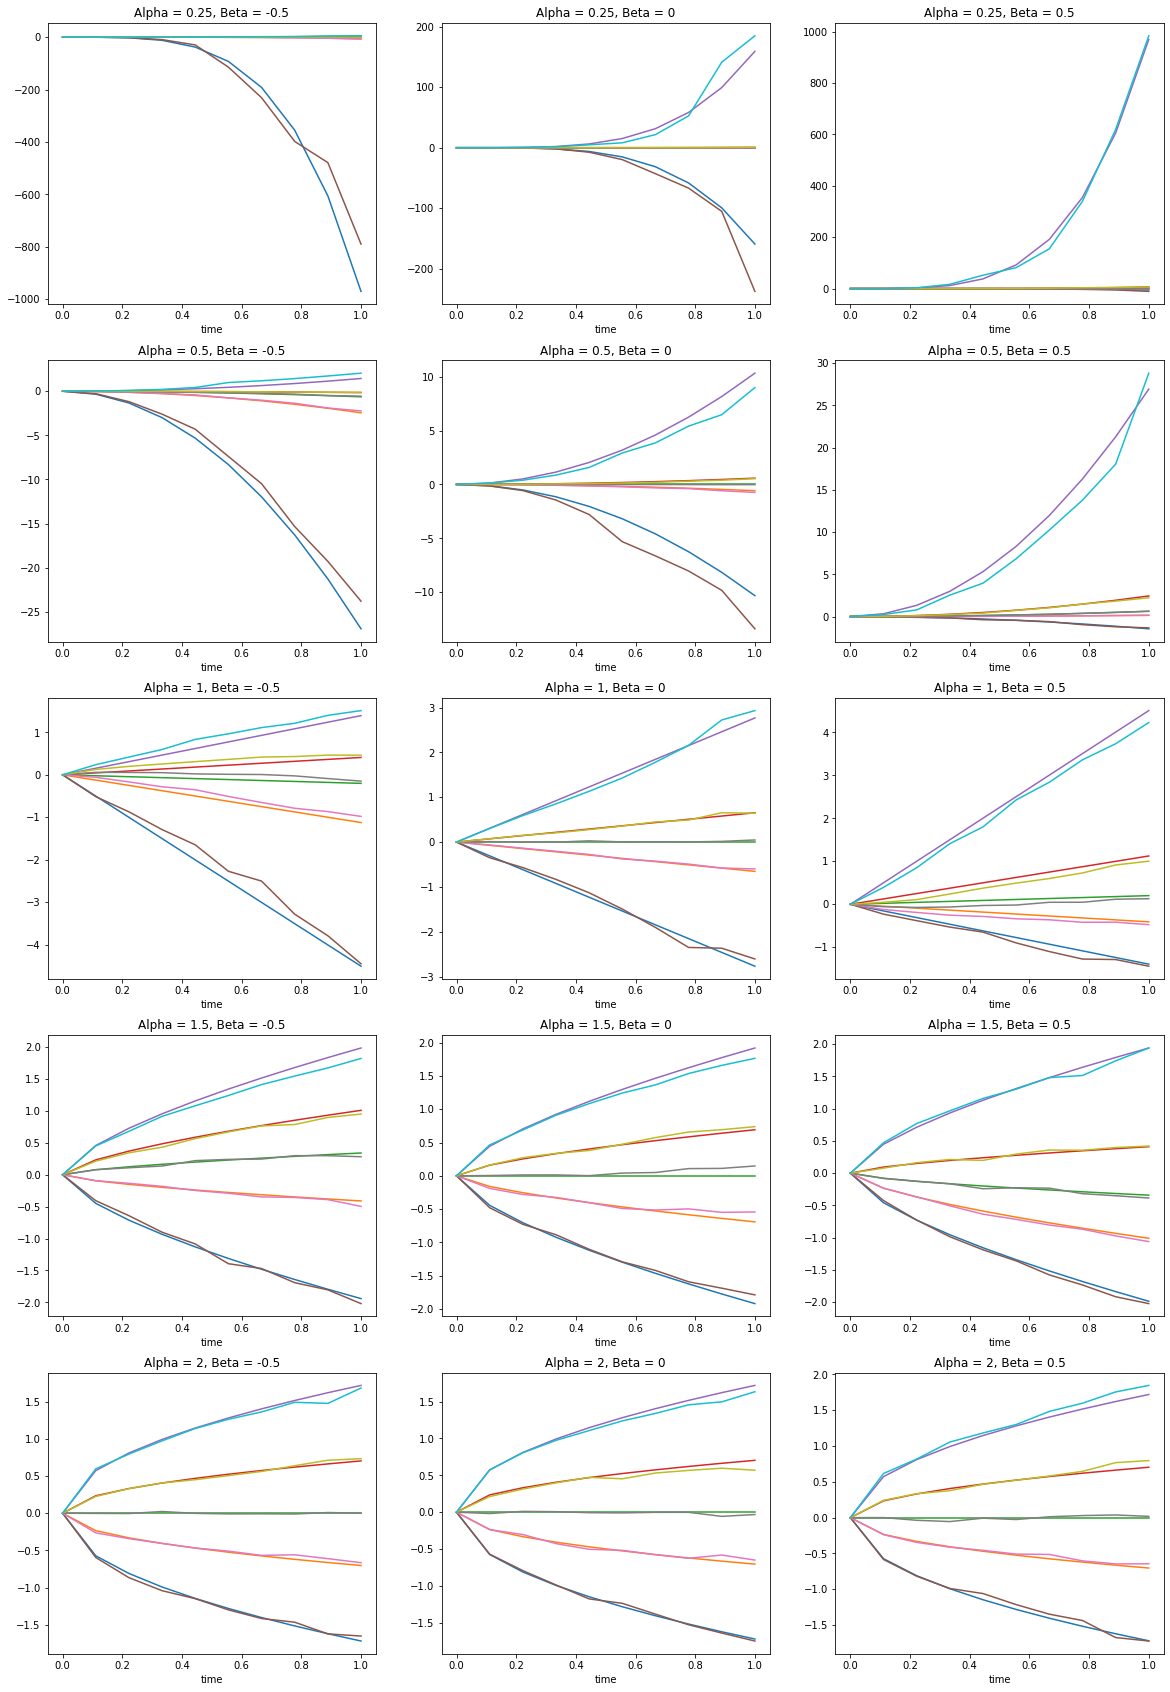

In [6]:
Alphas = [0.25, 0.5, 1, 1.5, 2]
Betas = [-0.5, 0, 0.5]

ps = [0.1, 0.3, 0.5, 0.7, 0.9]
T = 1
M = 10 ** 3
N = 10 ** 1
t = np.linspace(0, 1, N)
t_q = np.linspace(0, 1, M)

fig_q, axs_q = plt.subplots(nrows = len(Alphas), ncols = len(Betas), figsize = (2 * Image_width, 3 * Image_width))

for i, alpha in enumerate(Alphas):
    for j, beta in enumerate(Betas):
        
        Quantile = np.zeros([len(ps), N])
        Quantile_teoretic = np.zeros([len(ps),N])

        X = Levy_processes(T, M, N, alpha, beta)

        for Np, p in enumerate(ps):
            for k in range(N):
                Quantile[Np,:] = np.squeeze(equantile_proces(X.T, p))

            for k in range(len(ps)):
                Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha, beta)
        
        for k in range(N):
            Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha))
                
        ax_q = axs_q[i][j];
        ax_q.plot(t, Quantile_teoretic.T);
        ax_q.plot(t, Quantile.T);
        ax_q.set_xlabel("time")
        ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");

